# TransitCaller

**Author:** Omar Olivarez  
**Last edited:** 12/19/2020

*This notebook is to make calls to the Google Transit API and generate data.*

## Import libraries

In [2]:
#!pip install requests

In [1]:
import requests
import time
import json
import pandas as pd

## Locations Info

Round 1 Locations: Essential Neighborhoods to Hospitals:

In [2]:
# NEW LOCATIONS INFO
# TOP ESSENTIAL WORKERS
or1 = "place_id:ChIJp-dEj9pcwokRRIIbAITrxV8" # Canarsie location
or2 = "place_id:ChIJHxYhfC9hwokRtmzBNHTQOQw" # Jamaica
or3 = "place_id:ChIJ2XDsFddjwokRARMg8Zx_GJk" # Queens village
or4 = "place_id:ChIJCUPI05_2wokRc9ojcr_nW5I" # Washington heights
or5 = "place_id:ChIJc6C_g9T0wokRr5e3ZwWhHrA" # castle hill
origins = or1 + "|" + or2 + "|" + or3 + "|" + or4  + "|" + or5

des1 = "place_id:ChIJp1XNkaz0wokR9zxUKt5wjXM" # Calvary hospital the Bronx
des2 = "place_id:ChIJCSdHGX30wokRH6Q9fL30_Ag" # St Barnabas hospital west bronx
des3 = "place_id:ChIJH_3_XR70wokRERwBn0Q7VTg" # new york presybeterian Washingotn Heights
des4 = "place_id:ChIJceEubkhfwokRnPU64LKavB0" # Mt Sinai Queens
des5 = "place_id:ChIJHQA-knb2wokRfBq4XadP6hc" # new york health and hospitals harlem

destinations  = des1 + "|" + des2 + "|" + des3 + "|" + des4 + "|" + des5

# TIME
departure_time = "1607947200" # 12/14/20 at 7:00am ET

key = ""


Round 2 Locations: Essential Neighborhoods to Most Popular Stops:

In [3]:
# NEW LOCATIONS INFO - 2
# TOP ESSENTIAL WORKERS
or1 = "place_id:ChIJp-dEj9pcwokRRIIbAITrxV8" # Canarsie location
or2 = "place_id:ChIJHxYhfC9hwokRtmzBNHTQOQw" # Jamaica
or3 = "place_id:ChIJ2XDsFddjwokRARMg8Zx_GJk" # Queens village
or4 = "place_id:ChIJCUPI05_2wokRc9ojcr_nW5I" # Washington heights
or5 = "place_id:ChIJc6C_g9T0wokRr5e3ZwWhHrA" # castle hill
origins = or1 + "|" + or2 + "|" + or3 + "|" + or4  + "|" + or5

des1 = "place_id:ChIJ10bnS6tZwokROfmCPOetmk0" # 1st Most popular: Times Square
des2 = "place_id:ChIJo-VJKwJZwokRW7N1lvGskJs" # 2nd: Grand Central
des3 = "place_id:ChIJh3-JOKlZwokRF2zVuxg0pXc" # Herald Sq
des4 = "place_id:ChIJGxFxxJhZwokRaAQ22S4T8GA" # Union square
des5 = "place_id:ChIJU_Ox4gdbwokR56cfZqQf7X0" # Fulton St Station

destinations  = des1 + "|" + des2 + "|" + des3 + "|" + des4 + "|" + des5

# TIME
departure_time = "1607947200" # 12/14/20 at 7:00am ET

key = ""

## Time Info

In [4]:
# 30 min calculation
thirty = 1800
day = 86400
d1 = departure_time
d2 = str(int(departure_time) + 86400)
d3 = str(int(d2) + 86400)
d4 = str(int(d3) + 86400)
d5 = str(int(d4) + 86400)

## Data Collection

In [5]:
iter_time = 1
iter_day = 0
flag = True
d = {}
csv_name = "output"

df_rows = []

iter_days = [d1, d2, d3, d4, d5]
#full
while iter_day <5:
    departure_time = iter_days[iter_day]
    print("DAY:", iter_day)
    while iter_time < 25:
        #print("RECORD: ", iter_time)
        URL = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=" 
        URL = URL + origins + "&destinations=" + destinations
        URL = URL + "&mode=transit&departure_time="
        URL = URL + departure_time + "&key="
        URL = URL + key
        r = requests.get(url = URL) 
        data = r.json() 
        
        # loop through the data and add it to lists to turn into df
        des_count = 0
        for ori in data["origin_addresses"]:
            or_count = 0
            for dest in data["destination_addresses"]:
                #print(ori, " ---- ", dest)
                try:
                   dur = data["rows"][des_count]["elements"][or_count]["duration"]["text"]
                except:
                  print("This option did not have a duration:", "origin:", ori, "dest:", dest, iter_time, "day:", iter_day)
               
                or_count += 1
                #print()
                #origins.append(ori)
                #destinations.append(dest)
                #durations.append(dur)
                #departure_times.append("7:30AM")
                row = [ori, dest, dur, departure_time]
                df_rows.append(row)
            des_count += 1
        
        # Ignore this section I think
        """name = csv_name + str(iter_time)+"day"+str(iter_day)+".csv"
        # Write to .CSV
        f = open(name, "w")
        f.write(r.text)
        f.close()"""
        # stop inoring section
        
        departure_time = str(int(departure_time) + thirty)
        iter_time += 1
        time.sleep(0.3)
    iter_day += 1
    iter_time = 1
    

DAY: 0
DAY: 1
DAY: 2
DAY: 3
DAY: 4


In [6]:
df = pd.DataFrame(columns=['origins', 'destinations', 'durations', 'departure_times'], data=df_rows)
df.head()

,origins,destinations,durations,departure_times
0,"1500 E 92nd St, Brooklyn, NY 11236, USA","Times Sq-42 St, New York, NY 10018, USA",1 hour 15 mins,1607947200
1,"1500 E 92nd St, Brooklyn, NY 11236, USA","Grand Central - 42 St, New York, NY 10017, USA",1 hour 17 mins,1607947200
2,"1500 E 92nd St, Brooklyn, NY 11236, USA","34 St - Herald Sq Subway Station, New York, NY...",1 hour 13 mins,1607947200
3,"1500 E 92nd St, Brooklyn, NY 11236, USA","14 St - Union Sq, New York, NY 10003, USA",58 mins,1607947200
4,"1500 E 92nd St, Brooklyn, NY 11236, USA","141 Fulton St, New York, NY 10038, USA",1 hour 6 mins,1607947200


In [7]:
df.tail()

,origins,destinations,durations,departure_times
2995,"2300 Randall Ave, The Bronx, NY 10473, USA","Times Sq-42 St, New York, NY 10018, USA",1 hour 7 mins,1608334200
2996,"2300 Randall Ave, The Bronx, NY 10473, USA","Grand Central - 42 St, New York, NY 10017, USA",1 hour 2 mins,1608334200
2997,"2300 Randall Ave, The Bronx, NY 10473, USA","34 St - Herald Sq Subway Station, New York, NY...",1 hour 12 mins,1608334200
2998,"2300 Randall Ave, The Bronx, NY 10473, USA","14 St - Union Sq, New York, NY 10003, USA",1 hour 7 mins,1608334200
2999,"2300 Randall Ave, The Bronx, NY 10473, USA","141 Fulton St, New York, NY 10038, USA",1 hour 13 mins,1608334200


We generated 1975 rows with this aggregation.

Now let's save this df as a csv for future analyses. We will need to convert the durations column to not be text and be time instead. 

In [56]:
df.to_csv(r'week_of_Dec_14.csv', index = False, header=True)

2nd Round generated CSV:

In [8]:
df.to_csv(r'week_of_Dec_14_most_pop.csv', index = False, header=True)

## Valid Code Ends Here, Ignore All Code Below!

## Ignore this

In [18]:
"""json_singleJSON = pd.read_json("output10day0.csv")
print(type(json_singleJSON))
json_singleJSON.head()"""

#json_singleJSON.to_csv("newcsv1219.csv")

<class 'pandas.core.frame.DataFrame'>


,destination_addresses,origin_addresses,rows,status
0,"1740 Eastchester Rd, The Bronx, NY 10461, USA","1500 E 92nd St, Brooklyn, NY 11236, USA","{'elements': [{'distance': {'text': '25.0 mi',...",OK
1,"4422 3rd Ave., The Bronx, NY 10456, USA","108-35 167th St, Queens, NY 11433, USA","{'elements': [{'distance': {'text': '23.0 mi',...",OK
2,"1447 St Nicholas Ave, New York, NY 10033, USA","102-29 215th St, Jamaica, NY 11429, USA","{'elements': [{'distance': {'text': '24.7 mi',...",OK
3,"25-10 30th Ave, Queens, NY 11102, USA","1290 St Nicholas Ave, New York, NY 10033, USA","{'elements': [{'distance': {'text': '7.4 mi', ...",OK
4,"506 Lenox Ave, New York, NY 10037, USA","2300 Randall Ave, The Bronx, NY 10473, USA","{'elements': [{'distance': {'text': '3.2 mi', ...",OK


## Practicing with a single JSON:

In [5]:
"""
json structure is:
first element: a dictionary with a value of a list of destinations
second: a dictionary with a value of a list of origins
third: a dictionary with a value of a list
where each list corresponds to an origin (in order)
within each list there is a dictionary where each value corresponds to a destination
the dictionary has one element which has a value of a list of dictionaries
each dictionary has a 
   distance key with another dictionary containing a distance/"text" value, and a "value" value
   duration key with another dict containing time/"text" and "value" values
   and a "status" value
"""

'\njson structure is:\nfirst element: a dictionary with a value of a list of destinations\nsecond: a dictionary with a value of a list of origins\nthird: a dictionary with a value of a list\nwhere each list corresponds to an origin (in order)\nwithin each list there is a dictionary where each value corresponds to a destination\nthe dictionary has one element which has a value of a list of dictionaries\neach dictionary has a \n   distance key with another dictionary containing a distance/"text" value, and a "value" value\n   duration key with another dict containing time/"text" and "value" values\n   and a \n\n\n\n'

In [16]:
# practice with just a few entries
URL = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=" 
URL = URL + origins + "&destinations=" + destinations
URL = URL + "&mode=transit&departure_time="
URL = URL + departure_time + "&key="
URL = URL + key
r = requests.get(url = URL) 
data = r.json() 

In [17]:
data

{'destination_addresses': ['1740 Eastchester Rd, The Bronx, NY 10461, USA',
  '4422 3rd Ave., The Bronx, NY 10456, USA',
  '1447 St Nicholas Ave, New York, NY 10033, USA',
  '25-10 30th Ave, Queens, NY 11102, USA',
  '506 Lenox Ave, New York, NY 10037, USA'],
 'origin_addresses': ['1500 E 92nd St, Brooklyn, NY 11236, USA',
  '108-35 167th St, Queens, NY 11433, USA',
  '102-29 215th St, Jamaica, NY 11429, USA',
  '1290 St Nicholas Ave, New York, NY 10033, USA',
  '2300 Randall Ave, The Bronx, NY 10473, USA'],
 'rows': [{'elements': [{'distance': {'text': '24.0 mi', 'value': 38653},
     'duration': {'text': '2 hours 2 mins', 'value': 7340},
     'status': 'OK'},
    {'distance': {'text': '21.4 mi', 'value': 34466},
     'duration': {'text': '2 hours 2 mins', 'value': 7295},
     'status': 'OK'},
    {'distance': {'text': '20.4 mi', 'value': 32863},
     'duration': {'text': '1 hour 41 mins', 'value': 6040},
     'status': 'OK'},
    {'distance': {'text': '13.6 mi', 'value': 21862},
    

In [21]:
print(data.keys())

dict_keys(['destination_addresses', 'origin_addresses', 'rows', 'status'])


In [36]:
origins = []
destinations = []
durations = []
departure_times = []
df_rows = []

des_count = 0
for ori in data["origin_addresses"]:
    or_count = 0
    for dest in data["destination_addresses"]:
        #print(ori, " ---- ", dest)
        dur = data["rows"][des_count]["elements"][or_count]["duration"]["text"]
        or_count += 1
        #print()
        #origins.append(ori)
        #destinations.append(dest)
        #durations.append(dur)
        #departure_times.append("7:30AM")
        row = [ori, dest, dur, "7:30AM"]
        df_rows.append(row)
    des_count += 1
        

In [38]:
#cols_list = [origins, destinations, durations, departure_times]
#df = pd.DataFrame(columns=['origins', 'destinations', 'durations', 'departure_times'], data=cols_list)
df = pd.DataFrame(columns=['origins', 'destinations', 'durations', 'departure_times'], data=df_rows)
df.head()

,origins,destinations,durations,departure_times
0,"1500 E 92nd St, Brooklyn, NY 11236, USA","1740 Eastchester Rd, The Bronx, NY 10461, USA",2 hours 2 mins,7:30AM
1,"1500 E 92nd St, Brooklyn, NY 11236, USA","4422 3rd Ave., The Bronx, NY 10456, USA",2 hours 2 mins,7:30AM
2,"1500 E 92nd St, Brooklyn, NY 11236, USA","1447 St Nicholas Ave, New York, NY 10033, USA",1 hour 41 mins,7:30AM
3,"1500 E 92nd St, Brooklyn, NY 11236, USA","25-10 30th Ave, Queens, NY 11102, USA",1 hour 28 mins,7:30AM
4,"1500 E 92nd St, Brooklyn, NY 11236, USA","506 Lenox Ave, New York, NY 10037, USA",1 hour 39 mins,7:30AM


In [ ]:
iter_time = 1
iter_day = 0
flag = True
d = {}
csv_name = "output"

iter_days = [d1, d2, d3, d4, d5]
#full
while iter_day <5:
    departure_time = iter_days[iter_day]
    while iter_time < 25:
        name = csv_name + str(iter_time)+"day"+str(iter_day)+".csv"
        with open(name) as json_file: 
            data = json.load(json_file) 
        employee_data = data['emp_details'] 
        iter_time += 1
    
    iter_day += 1
    iter_time = 1

# Opening JSON file and loading the data 
# into the variable data 
with open('data.json') as json_file: 
    data = json.load(json_file) 
  
employee_data = data['emp_details'] 
  
# now we will open a file for writing 
data_file = open('data_file.csv', 'w') 
  
# create the csv writer object 
csv_writer = csv.writer(data_file) 
  
# Counter variable used for writing  
# headers to the CSV file 
count = 0
  
for emp in employee_data: 
    if count == 0: 
  
        # Writing headers of CSV file 
        header = emp.keys() 
        csv_writer.writerow(header) 
        count += 1
  
    # Writing data of CSV file 
    csv_writer.writerow(emp.values()) 
  
data_file.close()

## OLD INFO

In [ ]:
# poor neighborhoods
# mott haven
mott_haven = "place_id:ChIJB8yhMMX1wokRYEbSXqeyuvk"  # New York City Housing Authority's Judge Lester Patterson, East 143rd Street, The Bronx, NY, USA

# hunts point
hunts_point = "place_id:ChIJKwrYQqT1wokR6tCuNNMsST8"  # New York City Terminal Produce Market

# brownsville
brownsville = "place_id:ChIJKRTlguP0wokRQQjp4rcXOkQ"  # Food Bazaar Supermarket


origins = mott_haven + "|" + hunts_point + "|" + brownsville
destinations = "place_id:ChIJ_dkIzRhawokRcm_MIAmj9YA" # Chambers st station: 
key = ""
#mode = 
#language = 
#units = "imperial"
departure_time = "1607947200" # 12/14/20 at 7:30am ET

In [ ]:
# original version
#URL = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=place_id:ChIJTRRcxWxgwokR0_x-YAJbLgU&destinations=place_id:ChIJ99JOl4NbwokRSoTA_j2J22I|place_id:ChIJrd5vvolZwokRLR4z0Ui4KFs&mode=transit&departure_time=1434391201&transit_mode=bus|subway&key="

# version by a subway
# brooklyn boroughs hall:   ChIJRzJqIE1awokRz3UG3VkZejI
# destination:  Chambers st station:   ChIJ_dkIzRhawokRcm_MIAmj9YA
# time: 1606942796  = 10am NYC time on 12/2/20
# Time 1:
URL = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=" 
URL = URL + origins + "&destinations=" + destinations
URL = URL + "&mode=transit&departure_time="
URL = URL + departure_time + "&key="
URL = URL + key

# optional parameters: &transit_mode=bus|subway
r = requests.get(url = URL) 

data = r.json() 
data

## Visual Data

In [23]:
# +read the first dataset with pandas
df = pd.read_csv("results1.csv")
df.head()

,origin,destination,time,duration
0,"1740 Eastchester Rd, The Bronx, NY 10461, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",7:30,122
1,"4422 3rd Ave., The Bronx, NY 10456, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",7:30,122
2,"1447 St Nicholas Ave, New York, NY 10033, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",7:30,101
3,"25-10 30th Ave, Queens, NY 11102, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",7:30,88
4,"506 Lenox Ave, New York, NY 10037, USA","1500 E 92nd St, Brooklyn, NY 11236, USA",7:30,99


In [24]:
import matplotlib.pyplot as plt


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

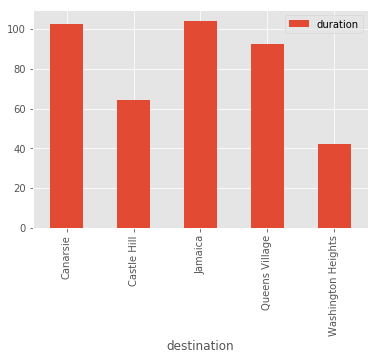

In [37]:
# filter out only the month and accidents cols
d = df[['destination', "duration", "time"]]
d['destination'] = d['destination'].replace('1500 E 92nd St, Brooklyn, NY 11236, USA', 'Canarsie')
d['destination'] = d['destination'].replace('108-35 167th St, Queens, NY 11433, USA', 'Queens Village')
d['destination'] = d['destination'].replace('102-29 215th St, Jamaica, NY 11429, USA', 'Jamaica')
d['destination'] = d['destination'].replace('1290 St Nicholas Ave, New York, NY 10033, USA', 'Washington Heights')
d['destination'] = d['destination'].replace('2300 Randall Ave, The Bronx, NY 10473, USA', 'Castle Hill')

#d.groupby(['destination', "time"]).agg('mean').unstack(1).plot(kind='bar', subplots=True)
d.groupby(['destination']).agg('mean').plot(kind='bar')

#d = df.groupby("origin").mean()
#d

In [ ]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

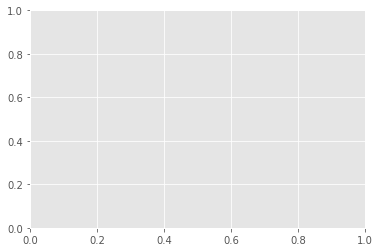

In [36]:
# filter out only the month and accidents cols
e = df[['origin', "duration"]]
#e = df.groupby("origin").mean()
e.groupby(['origin']).agg('mean').unstack(1).plot(kind='bar', subplots=True)


%matplotlib inline
plt.style.use('ggplot')

x = ['Jamaica', 'Queens Village', 'Washington Heights', 'Canarsie', 'Castle Hill']
energy = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

plt.show()

In [ ]:
# creating the dataset 
data = {'Jamaica':, 'Queens Village':, 'Washington Heights', 'Canarsie', 'Castle Hill'} 
courses = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(courses, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Courses offered") 
plt.ylabel("No. of students enrolled") 
plt.title("Students enrolled in different courses") 
plt.show() 

In [ ]:
test.groupby(['week', 'type', 
              'type2']).agg('sum').unstack(1).plot(kind='bar', subplots=True)

In [15]:
# Time 2
departure_time = "1606744800" # 11/30/20 at 9am ET
URL = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=" 
URL = URL + origins + "&destinations=" + destinations
URL = URL + "&mode=transit&departure_time="
URL = URL + departure_time + "&key="
URL = URL + key
r = requests.get(url = URL)
data = r.json() 
data

{'destination_addresses': ['Chambers Street Station, New York, NY 10007, USA'],
 'origin_addresses': ['301 E 143rd St, The Bronx, NY 10451, USA',
  '772 Edgewater Rd, The Bronx, NY 10474, USA',
  '1630 Bruckner Blvd, The Bronx, NY 10473, USA'],
 'rows': [{'elements': [{'distance': {'text': '10.4 mi', 'value': 16657},
     'duration': {'text': '45 mins', 'value': 2698},
     'status': 'OK'}]},
  {'elements': [{'distance': {'text': '12.8 mi', 'value': 20596},
     'duration': {'text': '1 hour 5 mins', 'value': 3889},
     'status': 'OK'}]},
  {'elements': [{'distance': {'text': '13.2 mi', 'value': 21221},
     'duration': {'text': '1 hour 3 mins', 'value': 3782},
     'status': 'OK'}]}],
 'status': 'OK'}

In [16]:
# Time 3
departure_time = "1606482000" # 11/27/20 at 8am ET
URL = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=" 
URL = URL + origins + "&destinations=" + destinations
URL = URL + "&mode=transit&departure_time="
URL = URL + departure_time + "&key="
URL = URL + key
r = requests.get(url = URL)
data = r.json() 
data

{'destination_addresses': ['Chambers Street Station, New York, NY 10007, USA'],
 'origin_addresses': ['301 E 143rd St, The Bronx, NY 10451, USA',
  '772 Edgewater Rd, The Bronx, NY 10474, USA',
  '1630 Bruckner Blvd, The Bronx, NY 10473, USA'],
 'rows': [{'elements': [{'distance': {'text': '10.4 mi', 'value': 16657},
     'duration': {'text': '45 mins', 'value': 2728},
     'status': 'OK'}]},
  {'elements': [{'distance': {'text': '12.8 mi', 'value': 20597},
     'duration': {'text': '1 hour 10 mins', 'value': 4189},
     'status': 'OK'}]},
  {'elements': [{'distance': {'text': '13.1 mi', 'value': 21010},
     'duration': {'text': '1 hour 11 mins', 'value': 4274},
     'status': 'OK'}]}],
 'status': 'OK'}

## Working example

In [33]:
# original working URL:
#URL = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=place_id:ChIJRzJqIE1awokRz3UG3VkZejI&destinations=place_id:ChIJ_dkIzRhawokRcm_MIAmj9YA&mode=transit&departure_time=1606942796&key=" #  try this time also:   1434391201    now: 1606776553


In [34]:
r = requests.get(url = URL) #, params = PARAMS 


In [35]:
data = r.json() 
data

{'destination_addresses': ['Chambers Street Station, New York, NY 10007, USA'],
 'origin_addresses': ['209 Joralemon St, Brooklyn, NY 11201, USA'],
 'rows': [{'elements': [{'status': 'ZERO_RESULTS'}]}],
 'status': 'OK'}

## Older info

In [ ]:
# example:
# Origin: Queens Botanical Garden plus code: Q529+5W%20New%20York  - place_id:  ChIJTRRcxWxgwokR0_x-YAJbLgU
# Destination: Brooklyn Children's Museum plus code: M3F4+QC%20New%20York  -place_id:  ChIJ99JOl4NbwokRSoTA_j2J22I
# Destination 2: Museum of Chinese in America plus code: P292+Q9%20New%20York  - place_id:  ChIJrd5vvolZwokRLR4z0Ui4KFs
# https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=Q529+5W%20New%20York&destinations=M3F4+QC%20New%20York|P292+Q9%20New%20York&mode=transit&departure_time=2020-06-15T13:00:00.00&key=
#url = "https://maps.googleapis.com/maps/api/distancematrix/json"
# url = "https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&origins=Q529+5W%20New%20York&destinations=M3F4+QC%20New%20York|P292+Q9%20New%20York&mode=transit&departure_time=2020-06-15T13:00:00.00&key="
# WORKING ONE: 
#URL: "https://maps.googleapis.com/maps/api/distancematrix/json"
#  THIS WORKS!




origins= "ChIJTRRcxWxgwokR0_x-YAJbLgU"          
units = "imperial"
destinations = "place_id:ChIJ99JOl4NbwokRSoTA_j2J22I|place_id:ChIJrd5vvolZwokRLR4z0Ui4KFs" # |P292%2BQ9%20New%20York
mode= "transit"
departure_time= "1434391201"  #9999-12-31T23:59:59.999999999Z, 1434391201,  2020-06-15T13:00:00.00
key=""
PARAMS = {'origins':origins, "units": units, "destinations": destinations, "mode": mode, "departure_time": departure_time, "key": key} 




